# Deskripsi library yang digunakan

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import linecache

# Fungsi memanggil data set

In [28]:
df = pd.read_csv('DiamondsPrices.csv')

## <font color = FF66B2> Business Understanding </font>
Tahap Business Understanding pada proyek ini bertujuan untuk memahami masalah bisnis, yaitu bagaimana meningkatkan akurasi estimasi harga berlian agar dapat memberikan informasi yang lebih akurat bagi pelanggan dan membantu perusahaan dalam pengambilan keputusan bisnis yang lebih baik.

## <font color = FF66B2> Data Understanding </font>
- price : harga dalam dolar AS ($326--$18,823)

- carat : berat berlian (0,2--5,01)

- cut : kualitas potongan (Fair, Good, Very Good, Premium, Ideal)

- color : warna berlian, dari J (terburuk) hingga D (terbaik)

- clarity : pengukuran seberapa jelas berlian itu (I1 (terburuk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))

- x : Panjang dalam mm (0--10,74)

- y : lebar dalam mm (0--58.9)

- z : Kedalaman dalam mm (0--31.8)

- depth : Persentase kedalaman total = z / mean (x, y) = 2 * z / (x + y) (43--79)

- table : lebar bagian atas berlian relatif terhadap titik terlebar (43--95)

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## <font color = FF66B2> Data Preparation </font>

# Merubah data menjadi integer

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [31]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

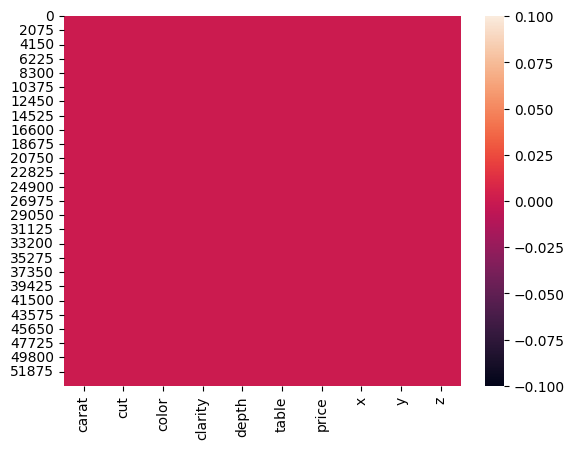

In [32]:
sns.heatmap(df.isnull())

In [33]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


C:\Users\andri\AppData\Local\Temp\ipykernel_9680\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

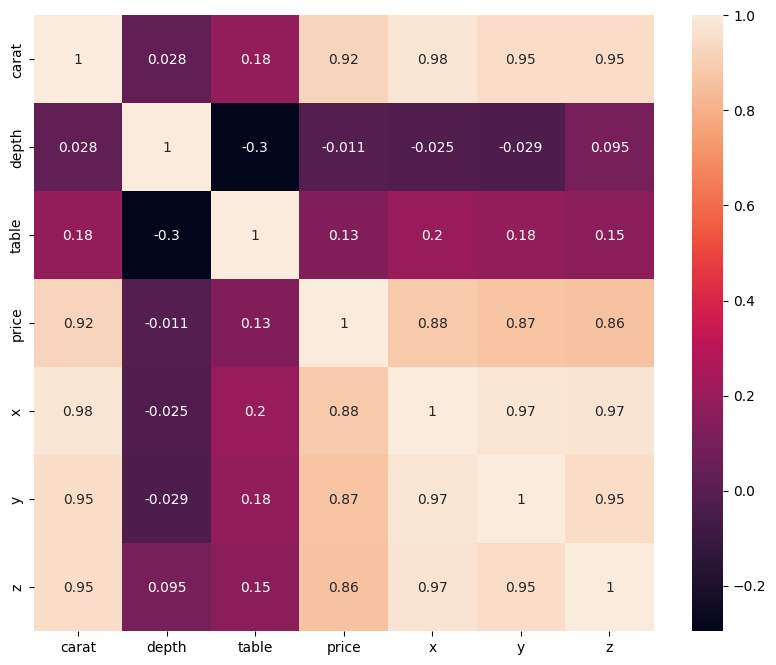

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah diamond berdasarkan karat

In [35]:
models = df.groupby('carat').count()[['depth']].sort_values(by='depth',ascending=True).reset_index()
models = models.rename(columns={'depth':'numberOfdimond'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

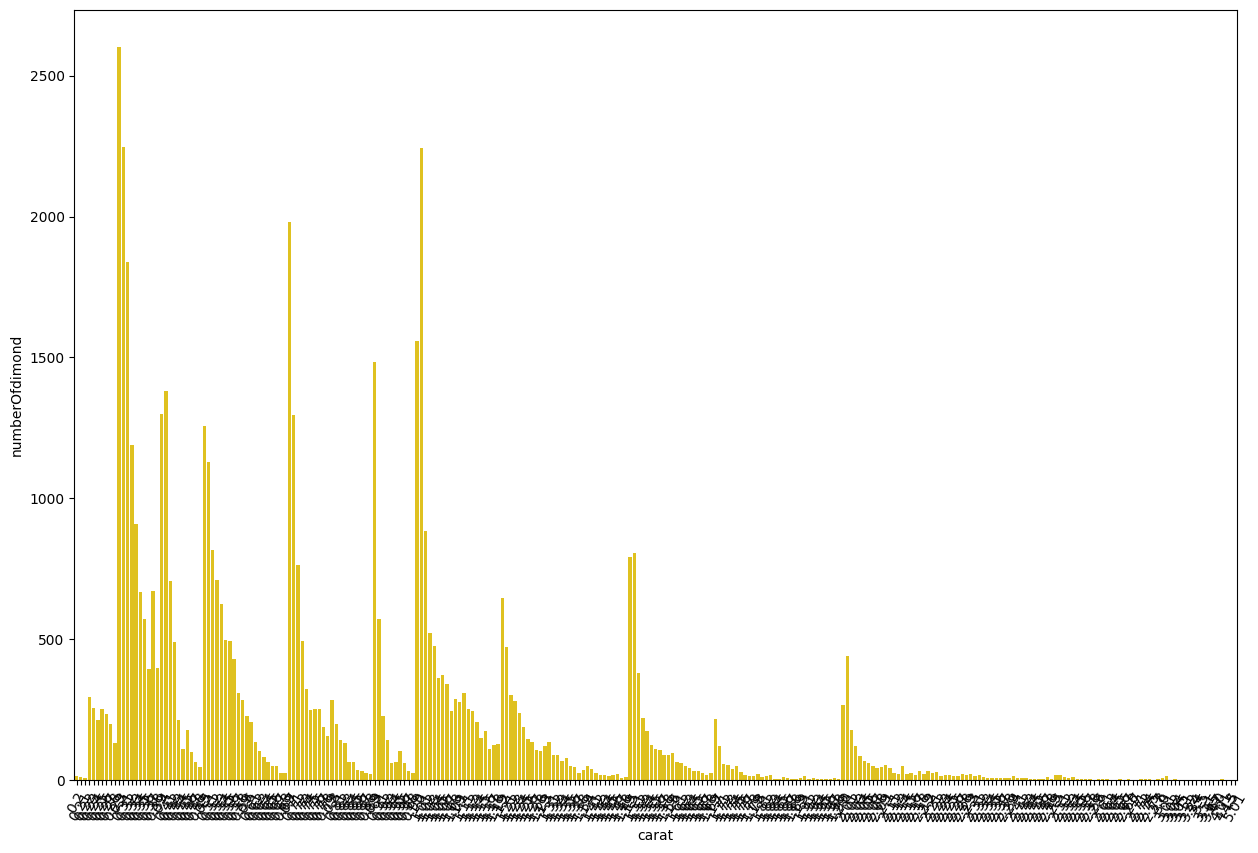

In [36]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x=models['carat'], y = models['numberOfdimond'], color='gold')
plt.xticks(rotation=60)

# Distribusi harga diamond

C:\Users\andri\AppData\Local\Temp\ipykernel_9680\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

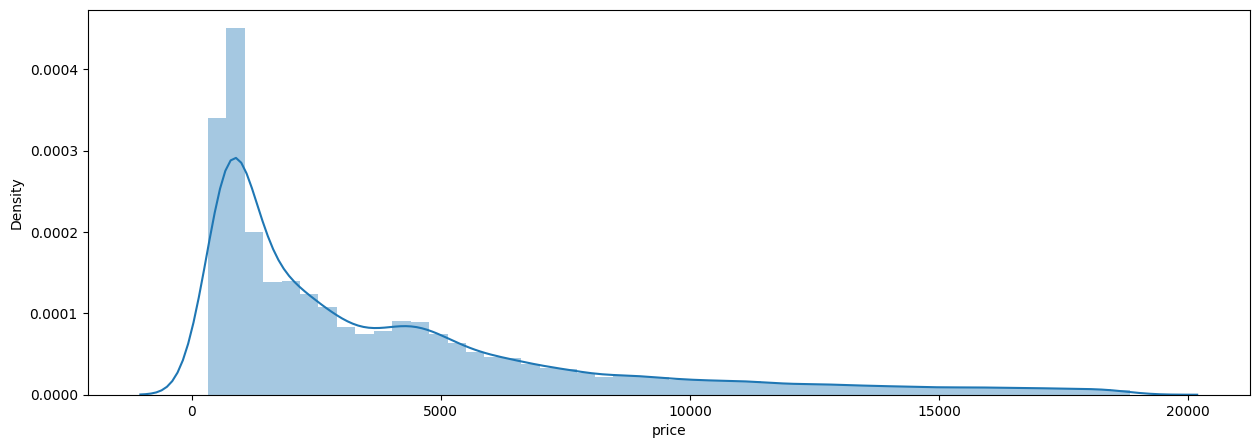

In [37]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# <font color = FF66B2> Modeling </font>

# Sleksi Feature

In [38]:
features = ['carat','depth','table','x','y','z']
x = df[features]
y = df['price']
x.shape, y.shape

((53940, 6), (53940,))

# Split data training dan data testing

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=60)
y_test.shape

(13485,)

# Membual model Regresi Linear

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

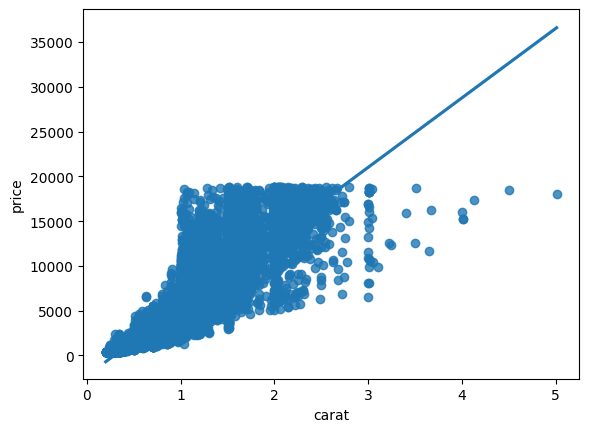

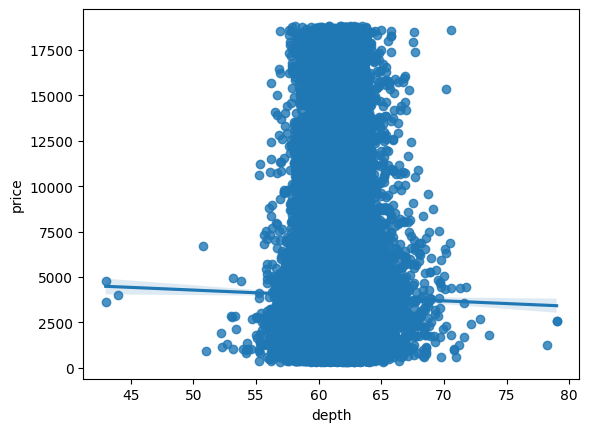

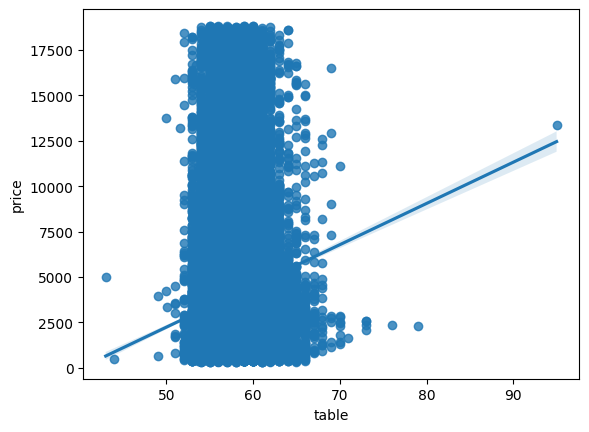

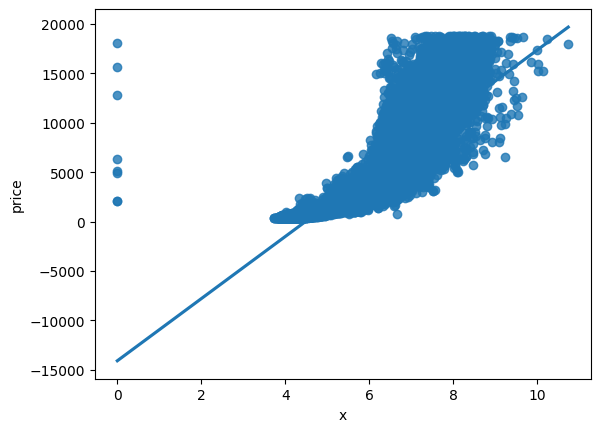

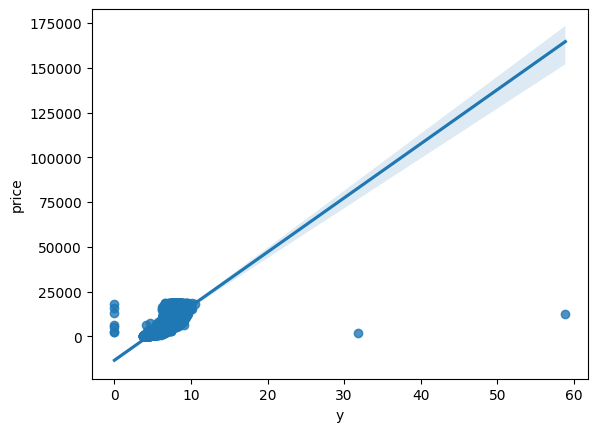

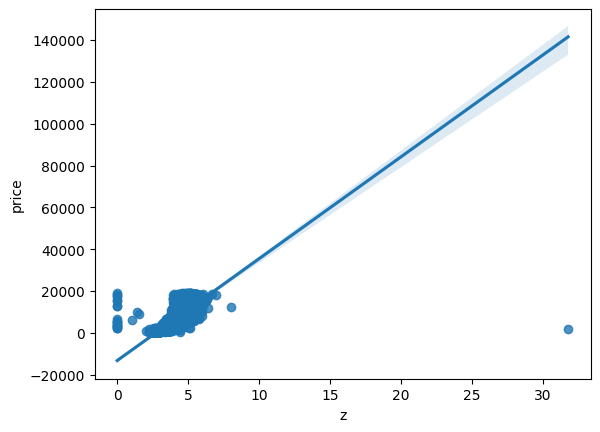

In [41]:
for features in df:
    if features in ['price','cut','color','clarity']:
        continue
    
    sns.regplot(y=df['price'],x=df[features])
    plt.show()

# <font color = FF66B2> Evaluation Model </font>

In [42]:
score = lr.score(x_test,y_test)
print('Akurasi model Regresi Linear', score)

Akurasi model Regresi Linear 0.8549558879593384


# Membuat input model Regresi Linear

In [43]:
input_data = np.array([[0.23,61.5,55,3.95,3.98,2.48]])

prediction = lr.predict(input_data)
print('Estimasi Harga Diamond tersebut adalah :',prediction)

Estimasi Harga Diamond tersebut adalah : [331.52670115]


c:\Users\andri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## <font color = FF66B2> Deployment </font>

In [44]:
import pickle

In [45]:
filename = 'diamond_model.sav'
pickle.dump(lr,open(filename,'wb'))

## Streamlit
https://andrians11-diamond-diamond-i466f5.streamlit.app/